In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import shapely.geometry as shp

Premier etape faire un circuit

Ref : *Spline_continuity.py* from PythonRobotics

In [27]:
class Spline2D:

    def __init__(self, x, y, kind="cubic"):
        self.s = self.__calc_s(x, y)
        self.sx = interpolate.interp1d(self.s, x, kind=kind)
        # self.sx = interpolate.lagrange(self.s, x)
        self.sy = interpolate.interp1d(self.s, y, kind=kind)
        #self.sy = interpolate.lagrange(self.s, y)

    def __calc_s(self, x, y):
        self.ds = np.hypot(np.diff(x), np.diff(y))
        s = [0.0]
        s.extend(np.cumsum(self.ds))
        return s

    def calc_position(self, s):
        x = self.sx(s)
        y = self.sy(s)
        return x, y

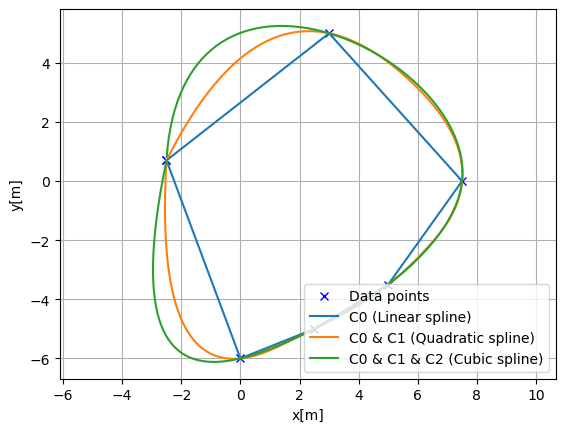

In [20]:
x = [-2.5, 0.0, 2.5, 5.0, 7.5, 3.0, -2.5]
y = [0.7, -6, -5, -3.5, 0.0, 5.0, 0.7]
ds = 0.1  # [m] distance of each interpolated points

plt.subplots(1)
plt.plot(x, y, "xb", label="Data points")

for (kind, label) in [("linear", "C0 (Linear spline)"),
                        ("quadratic", "C0 & C1 (Quadratic spline)"),
                        ("cubic", "C0 & C1 & C2 (Cubic spline)")]:
    rx, ry = [], []
    sp = Spline2D(x, y, kind=kind)
    s = np.arange(0, sp.s[-1], ds)
    for i_s in s:
        ix, iy = sp.calc_position(i_s)
        rx.append(ix)
        ry.append(iy)
    plt.plot(rx, ry, "-", label=label)

plt.grid(True)
plt.axis("equal")
plt.xlabel("x[m]")
plt.ylabel("y[m]")
plt.legend(loc='lower right')
plt.show()

array([0.        , 0.19167015, 0.30684957, 0.40400657, 0.54140732,
       0.67018183, 0.77120086, 0.8722199 , 1.        ])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


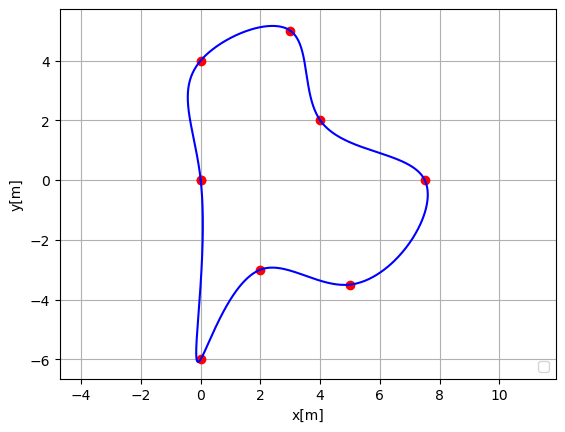

In [28]:
x = [0, 0, 2, 5.0, 7.5, 4.0, 3.0, 0]
y = [0, -6, -3, -3.5, 0.0, 2.0, 5.0, 4]

# Close the circuit
x = np.r_[x, x[0]]
y = np.r_[y, y[0]]
# fit splines to x=f(u) and y=g(u), treating both as periodic. also note that s=0
# is needed in order to force the spline fit to pass through all the input points.
tck, u = interpolate.splprep([x, y], s=0, per=True)

# evaluate the spline fits for 1000 evenly spaced distance values
xi, yi = interpolate.splev(np.linspace(0, 1, 1000), tck)

# plot the result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'or')
ax.plot(xi, yi, '-b')
plt.grid(True)
plt.axis("equal")
plt.xlabel("x[m]")
plt.ylabel("y[m]")
plt.legend(loc='lower right')
plt.show()

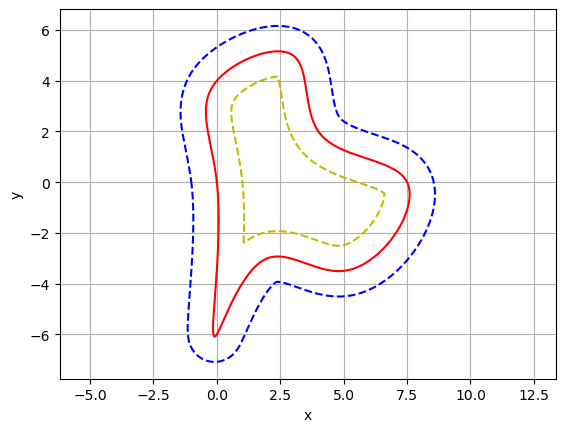

In [45]:
afpoly = shp.Polygon(zip(xi,yi))

poffafpoly = afpoly.buffer(1)  # Outward offset
noffafpoly = afpoly.buffer(-1)  # Inward offset

afpolypts = np.array(afpoly.exterior)
poffafpolypts = np.array(poffafpoly.exterior)
noffafpolypts = np.array(noffafpoly.exterior)

plt.plot(*afpolypts.T,'-r',)
plt.plot(*poffafpolypts.T, '--b')
plt.plot(*noffafpolypts.T, '--y')


plt.grid(True)
plt.axis("equal")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

TODO : fuction/class qui trans form juste des x,y en circuit